**The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status.**

1. Gender: M(male), F(female)

2. Age: Age of the patient

3. Smoking: YES=2 , NO=1.

4. Yellow fingers: YES=2 , NO=1.

5. Anxiety: YES=2 , NO=1.

6. Peer_pressure: YES=2 , NO=1.

7. Chronic Disease: YES=2 , NO=1.

8. Fatigue: YES=2 , NO=1.

9. Allergy: YES=2 , NO=1.

10. Wheezing: YES=2 , NO=1.

11. Alcohol: YES=2 , NO=1.

12. Coughing: YES=2 , NO=1.

13. Shortness of Breath: YES=2 , NO=1.

14. Swallowing Difficulty: YES=2 , NO=1.

15. Chest pain: YES=2 , NO=1.

16. Lung Cancer: YES , NO.

***Importing libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys

***Import dataset***

In [2]:
lc = pd.read_csv('../input/lung-cancer/survey lung cancer.csv')

***Overview of cancer data***

(1) Column names

In [3]:
print(lc.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


(2) Number of rows and columns

In [4]:
print(lc.shape)
print("number of rows: " + str(lc.shape[0]))
print("number of columns: " + str(lc.shape[1]))

(309, 16)
number of rows: 309
number of columns: 16


(3) First 10 rows of data

In [5]:
print(lc.head(10))

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   
5      F   75        1               2        1              1   
6      M   52        2               1        1              1   
7      F   51        2               2        2              2   
8      F   68        2               1        2              1   
9      M   53        2               2        2              2   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2  

(4) Last 10 rows of cancer data

In [6]:
print(lc.tail(10))

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
299      M   65        2               2        2              2   
300      F   63        2               2        2              2   
301      M   64        1               2        2              2   
302      F   65        2               2        2              2   
303      M   51        1               2        1              1   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
299                1         2         2         1                  1   
300                2         2         2         2                  1   
301                1         1  

(5) Basic information

In [7]:
print(lc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

***Cleaning of cancer data***

(1) Checking null values

In [8]:
print(lc.isnull())

     GENDER    AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0     False  False    False           False    False          False   
1     False  False    False           False    False          False   
2     False  False    False           False    False          False   
3     False  False    False           False    False          False   
4     False  False    False           False    False          False   
..      ...    ...      ...             ...      ...            ...   
304   False  False    False           False    False          False   
305   False  False    False           False    False          False   
306   False  False    False           False    False          False   
307   False  False    False           False    False          False   
308   False  False    False           False    False          False   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0              False     False     False     False              False   
1

In [9]:
print(lc.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


(2) Checking duplicate values

In [10]:
print(lc.duplicated().any())

True


In [11]:
print(lc.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
304     True
305     True
306     True
307     True
308     True
Length: 309, dtype: bool


In [12]:
lc_no_dup = lc.drop_duplicates()
print(lc_no_dup)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
279      F   59        1               2        2              2   
280      F   59        2               1        1              1   
281      M   55        2               1        1              1   
282      M   46        1               2        2              1   
283      M   60        1               2        2              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

(3) Number of rows and columns after cleaning

In [13]:
print(lc_no_dup.shape)
print("number of rows: " + str(lc_no_dup.shape[0]))
print("number of columns: " + str(lc_no_dup.shape[1]))

(276, 16)
number of rows: 276
number of columns: 16


***Analysis of data***

(1) Overview of statistics

In [14]:
print(lc.describe())

              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.4

(1) Number of males and females

In [15]:
g = lc.value_counts("GENDER")
print(g)

GENDER
M    162
F    147
dtype: int64


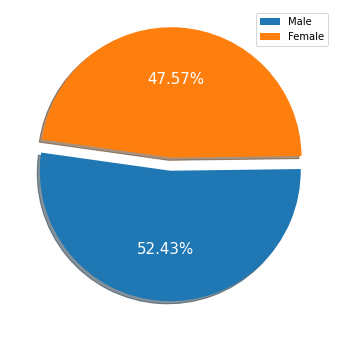

In [16]:
plt.figure(figsize=(6,6))
plt.pie(g, labels=['Male','Female'], autopct="%.2f%%", textprops={"fontsize":15, "color":"w"}, explode=[0, 0.1], shadow=True, startangle=172)
plt.legend()
plt.show()

(2) Number of patients with and without cancer

In [17]:
print(lc.value_counts("LUNG_CANCER"))

LUNG_CANCER
YES    270
NO      39
dtype: int64


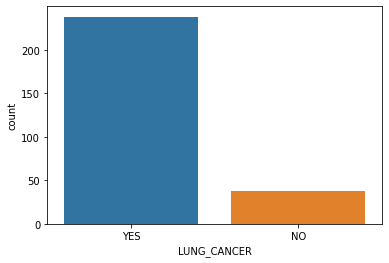

In [18]:
sns.countplot(x="LUNG_CANCER", data=lc_no_dup)
plt.show()

(3) Relationship of cancer occurance with other variables

In [19]:
lc_no_dup["GENDER"]=lc_no_dup["GENDER"].replace(["M","F"],["Male","Female"])
lc_no_dup["LUNG_CANCER"]=lc_no_dup["LUNG_CANCER"].replace(["YES","NO"],["Yes","No"])

if __name__ == "__main__":
    
    col = [ 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN' ]
for x in col:
    lc_no_dup[x]=lc_no_dup[x].replace([1,2],["No","Yes"])
        
print(lc_no_dup)

     GENDER  AGE SMOKING YELLOW_FINGERS ANXIETY PEER_PRESSURE CHRONIC DISEASE  \
0      Male   69      No            Yes     Yes            No              No   
1      Male   74     Yes             No      No            No             Yes   
2    Female   59      No             No      No           Yes              No   
3      Male   63     Yes            Yes     Yes            No              No   
4    Female   63      No            Yes      No            No              No   
..      ...  ...     ...            ...     ...           ...             ...   
279  Female   59      No            Yes     Yes           Yes              No   
280  Female   59     Yes             No      No            No             Yes   
281    Male   55     Yes             No      No            No              No   
282    Male   46      No            Yes     Yes            No              No   
283    Male   60      No            Yes     Yes            No              No   

    FATIGUE  ALLERGY  WHEEZ

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

GENDER  LUNG_CANCER
Female  No              21
        Yes            113
Male    No              17
        Yes            125
Name: LUNG_CANCER, dtype: int64


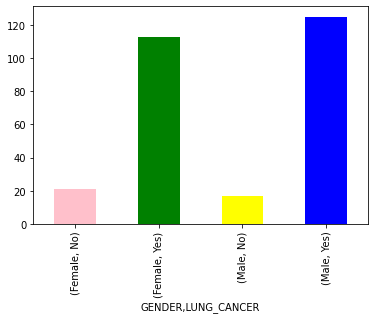

Conclusion: Males mostly have lung cancers


In [20]:
x = lc_no_dup.groupby(["GENDER","LUNG_CANCER"])["LUNG_CANCER"].count()
print(x)

x.plot(kind="bar", color=["pink", "green", "yellow", "blue"])
plt.show()

print ("Conclusion: Males mostly have lung cancers")

GENDER  SMOKING
Female  No         64
        Yes        70
Male    No         62
        Yes        80
Name: LUNG_CANCER, dtype: int64


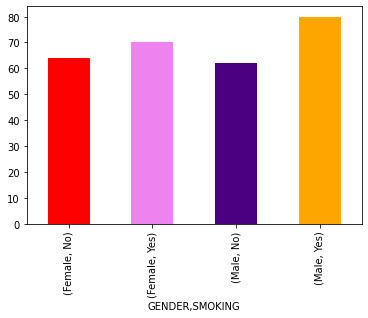

Conclusion: Males mostly smoke


In [21]:
x = lc_no_dup.groupby(["GENDER","SMOKING"])["LUNG_CANCER"].count()
print(x)

x.plot(kind="bar", color=["red", "violet", "indigo", "orange"])
plt.show()

print("Conclusion: Males mostly smoke")

SMOKING  LUNG_CANCER
No       No              19
         Yes            107
Yes      No              19
         Yes            131
Name: LUNG_CANCER, dtype: int64


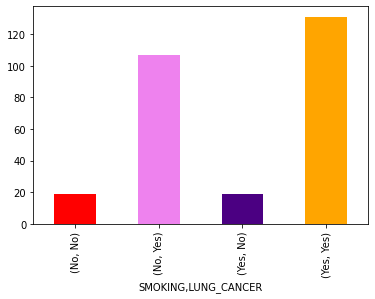

Conclusion: Smoking causes lung cancer


In [22]:
x = lc_no_dup.groupby(["SMOKING", "LUNG_CANCER"])["LUNG_CANCER"].count()
print(x)

x.plot(kind="bar", color=["red", "violet", "indigo", "orange"])
plt.show()

print("Conclusion: Smoking causes lung cancer")

GENDER  SMOKING  LUNG_CANCER
Female  No       No             11
                 Yes            53
        Yes      No             10
                 Yes            60
Male    No       No              8
                 Yes            54
        Yes      No              9
                 Yes            71
Name: LUNG_CANCER, dtype: int64


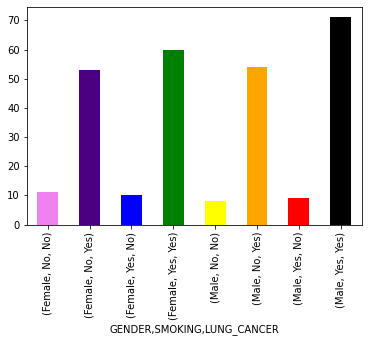

Conclusion: Males who smokes mostly have lung cancer


In [23]:
x = lc_no_dup.groupby(["GENDER", "SMOKING", "LUNG_CANCER"])["LUNG_CANCER"].count()
print(x)

x.plot(kind="bar", color=["violet", "indigo", "blue", "green", "yellow", "orange", "red", "black"])
plt.show()

print("Conclusion: Males who smokes mostly have lung cancer")

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         0   69        0               1        1              0   
1         0   74        1               0        0              0   
2         1   59        0               0        0              1   
3         0   63        1               1        1              0   
4         1   63        0               1        0              0   
..      ...  ...      ...             ...      ...            ...   
279       1   59        0               1        1              1   
280       1   59        1               0        0              0   
281       0   55        1               0        0              0   
282       0   46        0               1        1              0   
283       0   60        0               1        1              0   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  0         1         0         1                  1   
1                  1     

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


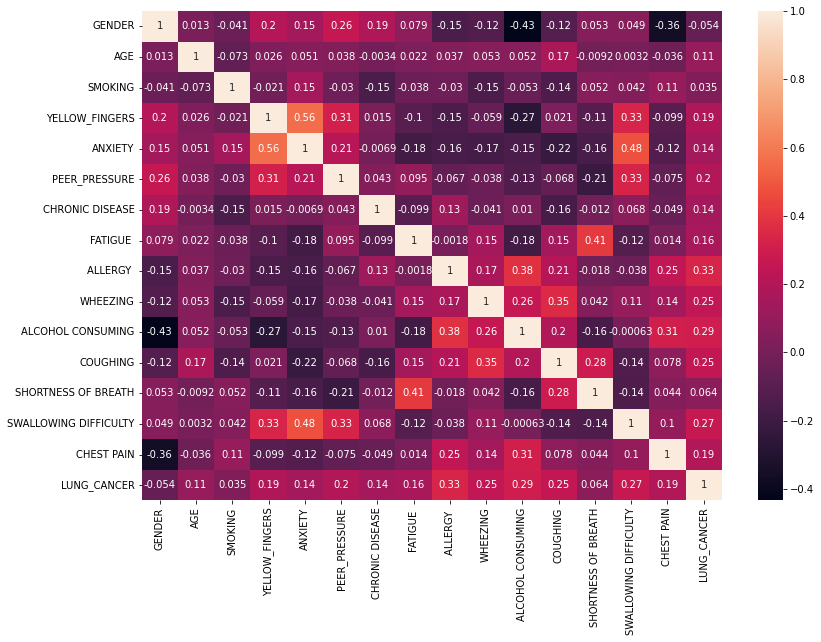

In [24]:
lc_no_dup["GENDER"]=lc_no_dup["GENDER"].replace(["Male","Female"],[0,1])
col=['SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']
for x in col:
        lc_no_dup[x]=lc_no_dup[x].replace(['No', 'Yes'],[0,1])
        
print(lc_no_dup)

plt.figure(figsize=(13,9))
sns.heatmap(lc_no_dup.corr(), annot=True)
plt.show()